<a href="https://colab.research.google.com/github/AI-FREE-Team/Machine-Learning-Basic/blob/master/Materials/%E8%A6%96%E8%A6%BA%E5%8C%96_%E6%8A%98%E7%B7%9A%E5%9C%96_%E9%9D%A2%E7%A9%8D%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>

# 前言

本文開始帶領大家以視覺化的統計圖表探索資料，將介紹 <font color="#00dd00">**Line Chart**</font> 和 <font color="#00dd00">**Area Plot**</font> ，讓大家瞭解如何善用統計圖表說明資料。在開始之前別忘了匯入中文字型喔！要先把檔案放到右側 file 夾中，確認上傳完成後再執行下面的語法

In [ ]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont( 'taipei_sans_tc_beta.ttf' )
mpl.rc( 'font', family='Taipei Sans TC Beta' )

## 匯入基本套件

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 
import seaborn as sns

print( 'NumPy 版本: ', np.__version__ )
print( 'Pandas 版本: ', pd.__version__ )  
print( 'Matplotlib 版本: ', matplotlib.__version__ )
print( 'Seaborn 版本: ', sns.__version__ )

NumPy 版本:  1.19.5
Pandas 版本:  1.1.5
Matplotlib 版本:  3.2.2
Seaborn 版本:  0.11.1


# 折線圖/趨勢線 (Line Chart)

折線圖 (Line Chart) 常用來觀察資料的變化趨勢，如：公司每月的營收、網站一天中各時段的瀏覽量等。</br>

## 實際應用：COVID-19

In [ ]:
#@markdown 資料來源：[Our World in Data](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=earliest..2021-05-03&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Align+outbreaks=false&country=USA~GBR~DEU~CHN~KOR~TWN~JPN)

from IPython.core.display import HTML

HTML('<iframe src="https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=earliest..2021-05-03&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Align+outbreaks=false&country=USA~GBR~DEU~CHN~KOR~TWN~JPN&hideControls=true" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>' )

* 資料特性：會隨時間變動
* 指令：[`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
* 說明：可在直角坐標平面中繪製折線圖
* 常用參數
  * linestyle (ls)：線條的樣式，其他的樣式請參考 [Linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
    * '-'：實線
    * '--'：虛線
    * '_.'：點虛線
    * ':'：點線
  * linewidth (lw)：線條的寬度    
  * marker：標記點的樣式，其他的樣式請參考 [matplotlib.markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
    * 'o'：圓圈 
    * '*'：星號
    * '+'：加號   
  * markersize：標記點的大小
  * color：線條與標記點的顏色，可透過顏色代號或 RGB 序對進行設定，下列為常用的顏色代號與序對  
    * 紅色：'r' / (1,0,0) 
    * 綠色：'g' / (0,1,0) 
    * 藍色：'b' / (0,0,1) 
    * 黃色：'y' / (1,1,0)   
  * alpha：折線圖的透明度，參數範圍為 $[0,1]$，其中，0 表示完全透明，1 表示不透明。

## 小範例

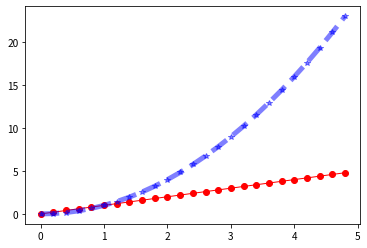

In [ ]:
# Data 
x = np.arange(0,5,0.2)
y1 = x 
y2 = x**2

# 折線圖 Line Chart
plt.plot( x, y1, linestyle='-', linewidth=1, marker='o', color='r' )
plt.plot( x, y2, linestyle='--', linewidth=5, marker='*', color='b', alpha=0.5 )

plt.show()

## 實作範例 - COVID-19 疫情

* 資料來源 : [COVID-19 全球疫情地圖](https://covid-19.nchc.org.tw/dt_005-covidTable_taiwan.php?downloadall=yes) COVID-19 疫情紀錄表單  
* 資料下載時間 : 2021/6/12 09:15 PM

### Step 1：匯入資料

首先，透過程式碼將資料集檔案 (excel) 從 GitHub 下載

In [ ]:
!git clone https://github.com/AI-FREE-Team/Machine-Learning-Basic.git

Cloning into 'Machine-Learning-Basic'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 232 (delta 105), reused 106 (delta 32), pack-reused 0
Receiving objects: 100% (232/232), 12.10 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (105/105), done.


In [ ]:
#若需要重新下載資料，先執行下面的語法：
#!rm -r /content/Machine-Learning-Basic

In [ ]:
# 匯入 xlsx 檔
raw_data01 = pd.read_excel( '/content/Machine-Learning-Basic/Content/COVID-19/COVID-19疫情紀錄表單.xlsx', header=1 )
raw_data01.head()

,ID,iso_code,洲名,國家,日期,總確診數,新增確診數,七天移動平均新增確診數,總死亡數,新增死亡數,七天移動平均新增死亡數,每百萬人確診數,每百萬人死亡數,傳染率,新增檢驗件數,總檢驗件數,每千人檢驗件數,七天移動平均新增檢驗件數,陽性率,每確診案例相對檢驗數量,疫苗總接種總劑數,疫苗總接種人數,疫苗新增接種劑數,七天移動平均疫苗新增接種劑數,每百人接種疫苗劑數,每百人接種疫苗人數,疫情控管指數,總人口數,中位數年紀,70歲以上人口比例,平均壽命
0,513,TWN,亞洲,台灣,2021-06-11,12500,278,293.429,385,24,28.286,524.840,16.165,0.00,0,0,0.000,0,0.000,0.0,799129,799129,16829,17244,3.36,3.36,0.0,23816775,42.2,8.353,80.46
1,512,TWN,亞洲,台灣,2021-06-10,12222,254,321.143,361,28,27.857,513.168,15.157,0.00,22852,804931,33.797,25468,0.013,79.3,782300,782300,22554,22595,3.28,3.28,0.0,23816775,42.2,8.353,80.46
2,511,TWN,亞洲,台灣,2021-06-09,11968,274,368.429,333,25,26.286,502.503,13.982,1.25,29800,782079,32.837,26200,0.014,71.1,759746,759746,16168,28245,3.19,3.19,0.0,23816775,42.2,8.353,80.46
3,510,TWN,亞洲,台灣,2021-06-08,11694,203,407.429,308,22,24.429,490.998,12.932,1.25,29954,752279,31.586,26049,0.016,63.9,743578,743578,18759,30264,3.12,3.12,0.0,23816775,42.2,8.353,80.46
4,509,TWN,亞洲,台灣,2021-06-07,11491,193,425.714,286,26,23.143,482.475,12.008,1.26,32829,722325,30.328,26179,0.016,61.5,724819,724819,25632,31912,3.04,3.04,0.0,23816775,42.2,8.353,80.46


In [ ]:
# 檢視各欄位的資料型態
raw_data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              513 non-null    int64  
 1   iso_code        513 non-null    object 
 2   洲名              513 non-null    object 
 3   國家              513 non-null    object 
 4   日期              513 non-null    object 
 5   總確診數            513 non-null    int64  
 6   新增確診數           513 non-null    int64  
 7   七天移動平均新增確診數     513 non-null    float64
 8   總死亡數            513 non-null    int64  
 9   新增死亡數           513 non-null    int64  
 10  七天移動平均新增死亡數     513 non-null    float64
 11  每百萬人確診數         513 non-null    float64
 12  每百萬人死亡數         513 non-null    float64
 13  傳染率             513 non-null    float64
 14  新增檢驗件數          513 non-null    int64  
 15  總檢驗件數           513 non-null    int64  
 16  每千人檢驗件數         513 non-null    float64
 17  七天移動平均新增檢驗件數    513 non-null    int

In [ ]:
print( f'df 每個欄位缺失值的總數：\n{raw_data01.isnull( ).sum()}\n' )

df 每個欄位缺失值的總數：
ID                0
iso_code          0
洲名                0
國家                0
日期                0
總確診數              0
新增確診數             0
七天移動平均新增確診數       0
總死亡數              0
新增死亡數             0
七天移動平均新增死亡數       0
每百萬人確診數           0
每百萬人死亡數           0
傳染率               0
新增檢驗件數            0
總檢驗件數             0
每千人檢驗件數           0
七天移動平均新增檢驗件數      0
陽性率               0
每確診案例相對檢驗數量       0
疫苗總接種總劑數          0
疫苗總接種人數           0
疫苗新增接種劑數          0
七天移動平均疫苗新增接種劑數    0
每百人接種疫苗劑數         0
每百人接種疫苗人數         0
疫情控管指數            0
總人口數              0
中位數年紀             0
70歲以上人口比例         0
平均壽命              0
dtype: int64



發現資料很齊全，不需要進行資料的缺漏值處理

### Step 2：資料處理

#### 01、篩選資料
從【日期】欄位中，篩選出 2021年 5、6 月份的資料，且取出【日期】(文字型態)、【總確診數】、【總死亡數】欄位作為後續繪圖使用的資料

In [ ]:
plot_df01 = raw_data01[ raw_data01['日期'].str.contains('2021-05|2021-06') ][['日期','總確診數','總死亡數']]

print( 'Shape of Filtered Data = ', plot_df01.shape, '\n' )
print( plot_df01.head() )

Shape of Filtered Data =  (42, 3) 

           日期   總確診數  總死亡數
0  2021-06-11  12500   385
1  2021-06-10  12222   361
2  2021-06-09  11968   333
3  2021-06-08  11694   308
4  2021-06-07  11491   286


#### 02、處理日期型態的資料
針對 【日期】 欄位，將其資料型態從字串傳換成日期型態。透過 [`pandas.DataFrame.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) 函數能轉換 DataFrame 欄位中的資料型態 : 

In [ ]:
print( '【日期】欄位轉換前的資料型態:', type(plot_df01['日期'][0]) )

# 將文字型態轉的欄位轉換成日期型態
plot_df01['日期'] = plot_df01['日期'].astype('datetime64')

print( '【日期】欄位轉換後的資料型態:', type(plot_df01['日期'][0]),'\n' )
print( plot_df01.head(6) )

【日期】欄位轉換前的資料型態: <class 'str'>
【日期】欄位轉換後的資料型態: <class 'pandas._libs.tslibs.timestamps.Timestamp'> 

          日期   總確診數  總死亡數
0 2021-06-11  12500   385
1 2021-06-10  12222   361
2 2021-06-09  11968   333
3 2021-06-08  11694   308
4 2021-06-07  11491   286
5 2021-06-06  11298   260


### Step 3：繪圖

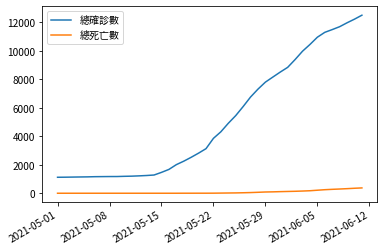

In [ ]:
import matplotlib.dates as mdates

# get columns to plot
columns = plot_df01.columns.drop(['日期'])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(plot_df01['日期'], plot_df01[column], linestyle='-', label=column)

# 設定 x 座標軸的日期標籤
plt.gca().xaxis.set_major_formatter( mdates.DateFormatter('%Y-%m-%d') )
plt.gca().xaxis.set_major_locator( mdates.DayLocator(interval=7) )
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

# 面積圖 (Area Plot)

面積圖 (Stacked Area Chart) 係用來觀察整體資料中不同類別之間的變化趨勢，非常適合用以表示多個類別與整體係如何隨著時間變化，如：公司所有產品每月的銷售量等。

## 實際應用：$CO_2$

In [ ]:
#@markdown 資料來源: [Our World in Data](https://ourworldindata.org/grapher/annual-co-emissions-by-region)

from IPython.core.display import HTML

HTML('<iframe src="https://ourworldindata.org/grapher/annual-co-emissions-by-region" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>')

## 小範例

我們可透過兩種方式來繪製堆疊面積圖 :   
* 方法一 : 使用 [`matplotlib.pyplot.fill_between()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) 函數填滿折線圖( Line Chart )的折線下面積

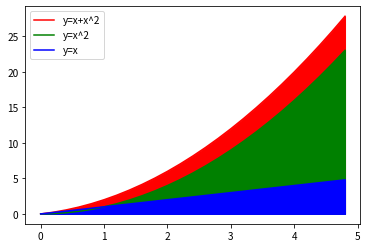

In [ ]:
# Data 
x = np.arange(0,5,0.2)
y1 = x 
y2 = x**2
y3 = y1+y2

# 堆疊面積圖 Stacked Area Chart
plt.plot( x, y3, color='r', label='y=x+x^2' )
plt.plot( x, y2, color='g', label='y=x^2' )
plt.plot( x, y1, color='b',label='y=x' )
plt.fill_between( x, y3, color='r' )
plt.fill_between( x, y2, color='g' )
plt.fill_between( x, y1, color='b' )

# 設定圖例的位置
plt.legend( loc='upper left' )

plt.show()

* 方法二 : 使用 [`matplotlib.pyplot.stackplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stackplot.html) 函數繪製堆疊面積圖。

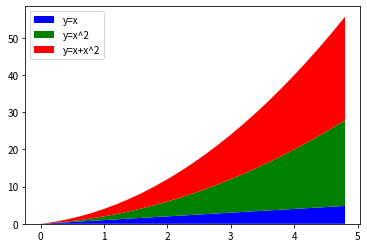

In [ ]:
# Data 
x = np.arange(0,5,0.2)
y1 = x 
y2 = x**2
y3 = y1+y2

# 堆疊面積圖 Stacked Area Chart
plt.stackplot( x, y1, y2, y3, colors=['b','g','r'], labels=['y=x','y=x^2','y=x+x^2'] )

# 設定圖例的位置
plt.legend( loc='upper left' )

plt.show()

## 實作範例 - COVID-19 疫情

### Step 1：匯入資料

要記得先把資料集檔案 (csv) 從 GitHub 下載下來喔！可先參考「折線圖/趨勢圖」的 Step 1，在此就不重複說明囉！

* 資料來源 : [COVID-19 全球疫情地圖](https://covid-19.nchc.org.tw/dt_005-covidTable_taiwan.php?downloadall=yes) 台灣 COVID-19 縣市鄉鎮疫情表單 
* 資料下載時間 : 2021/06/14 06:15 PM

In [ ]:
# 匯入 xlsx 檔
raw_data02 = pd.read_excel( '/content/Machine-Learning-Basic/Content/COVID-19/台灣COVID-19縣市鄉鎮疫情表單.xlsx', header=1 )
raw_data02.head()

,id,個案研判日,縣市,鄉鎮,性別,是否為境外移入,年齡層
0,175,2021-06-13,花蓮縣,新城鄉,女,否,15-19
1,174,2021-06-13,桃園市,龜山區,男,否,55-59
2,173,2021-06-13,桃園市,龜山區,男,否,45-49
3,172,2021-06-13,桃園市,龜山區,女,否,5-9
4,171,2021-06-13,桃園市,蘆竹區,男,否,55-59


In [ ]:
# 檢視各欄位的資料型態
raw_data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12921 entries, 0 to 12920
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       12921 non-null  int64 
 1   個案研判日    12921 non-null  object
 2   縣市       12921 non-null  object
 3   鄉鎮       12921 non-null  object
 4   性別       12921 non-null  object
 5   是否為境外移入  12921 non-null  object
 6   年齡層      12921 non-null  object
dtypes: int64(1), object(6)
memory usage: 706.7+ KB


In [ ]:
print( f'df 每個欄位缺失值的總數：\n{raw_data02.isnull( ).sum()}\n' )

df 每個欄位缺失值的總數：
id         0
個案研判日      0
縣市         0
鄉鎮         0
性別         0
是否為境外移入    0
年齡層        0
dtype: int64



發現資料很齊全，不需要進行資料的缺漏值處理

### Step 2：資料處理

#### 01、篩選資料
* 【個案研判日】為 2021年 5 月至 6 月   
* 【縣市】為 '新北市'  
* 【鄉鎮】為 '板橋區'、'中和區'、'三重區'

In [ ]:
df = raw_data02[ raw_data02['個案研判日'].str.contains('2021-05|2021-06') ]
df = df[ df['縣市']=='新北市' ]
df = df[ (df['鄉鎮']=='板橋區')|(df['鄉鎮']=='中和區')|(df['鄉鎮']=='三重區') ]
df

,id,個案研判日,縣市,鄉鎮,性別,是否為境外移入,年齡層
43,132,2021-06-13,新北市,板橋區,男,否,70+
44,131,2021-06-13,新北市,板橋區,男,否,45-49
45,129,2021-06-13,新北市,板橋區,男,否,25-29
46,130,2021-06-13,新北市,板橋區,男,否,25-29
47,128,2021-06-13,新北市,板橋區,女,否,70+
...,...,...,...,...,...,...,...
11696,11705,2021-05-12,新北市,中和區,女,否,60-64
11697,11704,2021-05-12,新北市,三重區,男,否,65-69
11698,11703,2021-05-12,新北市,三重區,男,否,60-64
11699,11702,2021-05-12,新北市,三重區,女,否,70+


* 保留 【個案研判日】、【縣市】、【性別】 三個欄位，作為後續繪圖的資料 :

In [ ]:
plot_df02 = df[ ['個案研判日','縣市','性別'] ]

#### 02、樞紐分析

* 統計新北市 2021年 5 月與 6 月每日男性與女性的個案總數，請參考 [`pandas.pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) ：

In [ ]:
summary = pd.pivot_table( plot_df02, index=['個案研判日','縣市'], columns=['性別'], aggfunc=len, margins=True, fill_value=0 )
summary

,性別,女,男,All
個案研判日,縣市,,,
2021-05-12,新北市,3,2,5
2021-05-13,新北市,0,1,1
2021-05-14,新北市,6,4,10
2021-05-15,新北市,28,10,38
2021-05-16,新北市,30,23,53
2021-05-17,新北市,42,37,79
2021-05-18,新北市,36,27,63
2021-05-19,新北市,25,34,59
2021-05-20,新北市,46,38,84


* 刪除樞紐分析表中男性與女性的總計

In [ ]:
# 刪除 DataFrame 中的最後一筆資料
summary.drop( summary.tail(1).index, inplace=True )
summary.tail()

,性別,女,男,All
個案研判日,縣市,,,
2021-06-09,新北市,22,50,72
2021-06-10,新北市,33,22,55
2021-06-11,新北市,35,24,59
2021-06-12,新北市,29,30,59
2021-06-13,新北市,22,13,35


* 樞紐分析表的索引欄位轉成 DataFrame 欄位

In [ ]:
summary.reset_index( inplace=True )
summary

性別,個案研判日,縣市,女,男,All
0,2021-05-12,新北市,3,2,5
1,2021-05-13,新北市,0,1,1
2,2021-05-14,新北市,6,4,10
3,2021-05-15,新北市,28,10,38
4,2021-05-16,新北市,30,23,53
5,2021-05-17,新北市,42,37,79
6,2021-05-18,新北市,36,27,63
7,2021-05-19,新北市,25,34,59
8,2021-05-20,新北市,46,38,84
9,2021-05-21,新北市,44,41,85


#### 02、處理日期型態的資料
針對 【個案研判日】 欄位，將其資料型態從字串傳換成日期型態。透過 [`pandas.DataFrame.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) 函數能轉換 DataFrame 欄位中的資料型態 :  

In [ ]:
summary['個案研判日'] = summary['個案研判日'].astype('datetime64')

### Step 3：繪圖

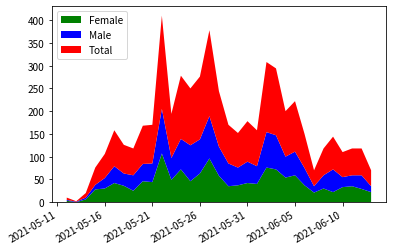

In [ ]:
import matplotlib.dates as mdates

# 堆疊面積圖 Stacked Area Chart
plt.stackplot( summary['個案研判日'], summary['女'], summary['男'], summary['All'], colors=['g','b','r'], labels=['Female','Male','Total'] )

# x 軸的日期標籤設定
plt.gca().xaxis.set_major_formatter( mdates.DateFormatter('%Y-%m-%d') )
plt.gca().xaxis.set_major_locator( mdates.DayLocator(interval=5) )
plt.gcf().autofmt_xdate()

# 設定圖例的位置
plt.legend( loc='upper left' )

plt.show()

## 實作範例 - 鐵達尼號

### Step 1：匯入資料

要記得先把資料集檔案 (csv) 從 GitHub 下載下來喔！可先參考「折線圖/趨勢圖」的 Step 1，在此就不重複說明囉！

* 資料來源：自 Kaggle 上 [鐵達尼號生存預測比賽](https://www.kaggle.com/c/titanic/overview/description) 取得，鐵達尼號已成為歷史上最著名的船舶之一。
<br>
* 資料說明：1912 年 4 月 10 日，鐵達尼號展開首航，也是唯一一次的載客出航，最終目的地為紐約。部分乘客為當時世界上頂尖富豪，以及許多來自英國、愛爾蘭、斯堪地那維亞和歐洲其他地區的移民，他們尋求在美國展開新生活的機會。4月15日在中途發生擦撞冰山後沉沒的嚴重災難。2,224 名船上人員中有 1,514 人罹難，成為近代史上最嚴重的和平時期船難。船長愛德華·約翰·史密斯最終與船一起沉沒，鐵達尼號總設計師湯瑪斯·安德魯斯也在這起災難中死亡。
<br>
* Kaggle 目標：儘管倖存有一些運氣，但似乎有些人比其他人更有可能生存。在 Kaggle 比賽中，要求使用乘客數據 (如：姓名、年齡、性別、社會經濟階層等) 建立一個能夠「什麼樣的人更有可能生存」的模型。

In [ ]:
#鐵達尼號 from kaggle
titanic_train = pd.read_csv( '/content/Machine-Learning-Basic/Content/titanic/train.csv' )
titanic_test = pd.read_csv( '/content/Machine-Learning-Basic/Content/titanic/test.csv' )
titanic_submit = pd.read_csv( '/content/Machine-Learning-Basic/Content/titanic/gender_submission.csv' )

In [ ]:
# 合併 train 及 test 的資料 
titanic_data = titanic_train.append( titanic_test, sort=False )
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


欄位說明如下：
* PassengerId 乘客編號
* Survived 是否倖存
* Pclass 船票等級
* Name 乘客姓名
* Sex 乘客性別
* Age 年齡
* SibSp 堂兄弟妹
* Parch 父母與小孩
* Ticket 船票號碼
* Fare 船票價格
* Cabin 船艙
* Embarked 登入港口

In [ ]:
print( f'原始資料長相：{titanic_data.shape}\n' )
print( f'df 每個欄位缺失值的總數：\n{titanic_data.isnull( ).sum()}\n' )

原始資料長相：(1309, 12)

df 每個欄位缺失值的總數：
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64



### Step 2：資料處理

#### 01、處理有缺漏值的欄位 

* 缺漏的部分補上值

In [ ]:
titanic_data['Age'].fillna(28, inplace=True)
titanic_data['Embarked'].fillna('S', inplace=True)

* 移除有缺漏值較多的欄位

In [ ]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
print( f'處理後的資料長相：{titanic_data.shape}\n' )
print( f'處理後 df 每個欄位缺失值的總數：\n{titanic_data.isnull( ).sum()}\n' )

處理後的資料長相：(1309, 11)

處理後 df 每個欄位缺失值的總數：
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64



#### 02、新增欄位

* SibSp 和 Parch 都與家人一起旅行有關。為簡單起見（並考慮可能的多重共線性），在此將這些變量的影響合併為一個分類預測變量：該人是否獨自旅行

In [ ]:
titanic_data['TravelBuds'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data['TravelAlone'] = np.where(titanic_data['TravelBuds']>0, 0, 1)

In [ ]:
titanic_data.drop('SibSp', axis=1, inplace=True)
titanic_data.drop('Parch', axis=1, inplace=True)
titanic_data.drop('TravelBuds', axis=1, inplace=True)

In [ ]:
print( f'處理後的資料長相：{titanic_data.shape}\n' )

處理後的資料長相：(1309, 10)



#### 03、建立類別型變數

In [ ]:
data02 = pd.get_dummies(titanic_data, columns=['Pclass'])
data03 = pd.get_dummies(data02, columns=['Embarked'])
df_final = pd.get_dummies(data03, columns=['Sex'])

In [ ]:
df_final.drop('Sex_female', axis=1, inplace=True)
df_final.drop('PassengerId', axis=1, inplace=True)
df_final.drop('Name', axis=1, inplace=True)
df_final.drop('Ticket', axis=1, inplace=True)
df_final.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0.0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1.0,38.0,71.2833,0,1,0,0,1,0,0,0
2,1.0,26.0,7.9250,1,0,0,1,0,0,1,0
3,1.0,35.0,53.1000,0,1,0,0,0,0,1,0
4,0.0,35.0,8.0500,1,0,0,1,0,0,1,1


### Step 3：繪圖

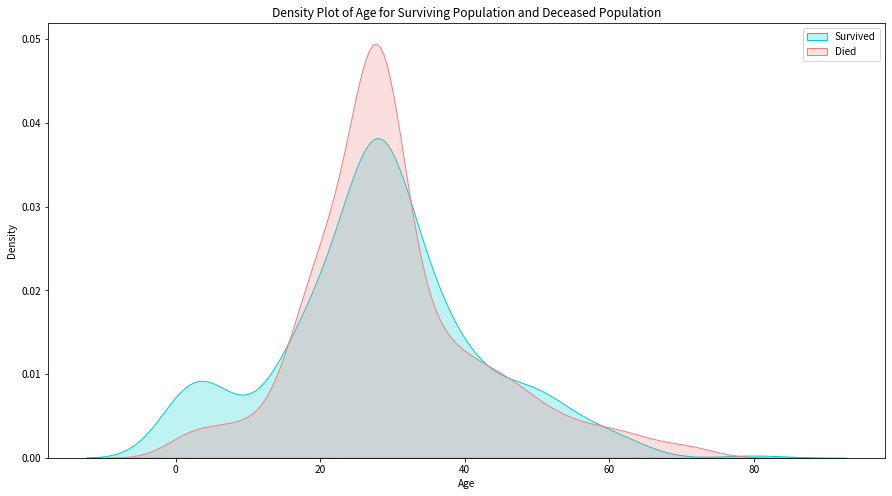

In [ ]:
plt.figure(figsize=(15,8))

sns.kdeplot(titanic_data['Age'][df_final.Survived==1], color='darkturquoise', shade=True)
sns.kdeplot(titanic_data['Age'][df_final.Survived==0], color='lightcoral', shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

# 結論

COVID-19 資料分析發現，總確診數新增的情形有趨於緩解，可能係因台灣自 2021/05/28 至 2021/06/21 進行全台三級警戒及疫苗規劃施打順序的成果，新北市確診死亡中，男女生確診死亡的分布相似，但男生死亡人數較女生多。<br>
鐵達尼號資料分析發現，倖存者和死者的年齡分佈實際上非常相似，顯著的區別是：在倖存者中，較大比例是兒童。乘客顯然是為了救孩子，讓他們坐在救生筏上。<br>
針對本文的內容，若讀者們有發現任何的錯誤或疑問，非常歡迎您 [來信 sueshow2006@gmail.com](mailto:sueshow2006@gmail.com) 給予建議及討論，讓我們一同來學習成長！

# 參考資料

* [Select by partial string from a pandas DataFrame](https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe)
* [Titanic - Feature understanding from Plots](https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots)
* [Titanic Analysis_Learning to Swim with Python](https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python)
* [python pandas pivot_table count frequency in one column](https://stackoverflow.com/questions/22412033/python-pandas-pivot-table-count-frequency-in-one-column)  

* [如何在 Colab 中透過 Kaggle API 下載資料集](https://blog.toright.com/posts/6817/%E5%A6%82%E4%BD%95%E5%9C%A8-colab-%E4%B8%AD%E9%80%8F%E9%81%8E-kaggle-api-%E4%B8%8B%E8%BC%89%E8%B3%87%E6%96%99%E9%9B%86.html)


# 返回 [課程大綱](https://github.com/AI-FREE-Team/Machine-Learning-Basic)